# Titanic Dataset Analysis

In [ ]:
#%pip install matplotlib
#%pip install seaborn
#%pip install pandas
#%pip install sklearn

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

###### Reading the Titanic data file Pandas DataFrame called data.

In [26]:
import pandas as pd

# URLs for the datasets
train_file_url = "https://raw.githubusercontent.com/YSayaovong/Refonte-Data-Engineer-Internship/refs/heads/main/Titanic-Dataset-Analysis/data/train.csv"
test_file_url = "https://raw.githubusercontent.com/YSayaovong/Refonte-Data-Engineer-Internship/refs/heads/main/Titanic-Dataset-Analysis/data/test.csv"

# Load the datasets
train = pd.read_csv(train_file_url)
test = pd.read_csv(test_file_url)

# Display the first few rows
print(train.head())
print(test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

#Reviewing Data

######Visualization and exploration of the data

In [27]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Data Cleaning and Preprocessing

######1 - Counting missing values per column
######2 - Handling the missing values with imputation
######3 - Encoding categorical variables

In [30]:
# Shape of training data (num_rows, num_columns)
print(train.shape)
print(test.shape)

# Number of missing values in each column of training data
missing_val_train = (train.isnull().sum())
missing_val_test = (test.isnull().sum())

print("Missing values in train :")
print(missing_val_train[missing_val_train > 0])
print("Missing values in test :")
print(missing_val_test[missing_val_test > 0])

(891, 12)
(418, 11)
Missing values in train :
Age         177
Cabin       687
Embarked      2
dtype: int64
Missing values in test :
Age       86
Fare       1
Cabin    327
dtype: int64


In [31]:
df = pd.DataFrame(train)
df_test = pd.DataFrame(test)

# Identifying numerical columns
numerical_cols_train = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols_test = df_test.select_dtypes(include=['int64', 'float64']).columns

# Identifying categorical columns
categorical_cols_train = df.select_dtypes(include=['object', 'category']).columns
categorical_cols_test = df_test.select_dtypes(include=['object', 'category']).columns

print("Numerical Columns Train:", numerical_cols_train)
print("Categorical Columns Train:", categorical_cols_train)

print("Numerical Columns Test:", numerical_cols_test)
print("Categorical Columns Test:", categorical_cols_test)

Numerical Columns Train: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Categorical Columns Train: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Numerical Columns Test: Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Categorical Columns Test: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [32]:
# Imputer for numerical data
num_imputer = SimpleImputer(strategy='median')
# Imputer for categorical data
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical columns
df[numerical_cols_train] = num_imputer.fit_transform(df[numerical_cols_train])
df_test[numerical_cols_test] = num_imputer.fit_transform(df_test[numerical_cols_test])

# Impute categorical columns
df[categorical_cols_train] = cat_imputer.fit_transform(df[categorical_cols_train])
df_test[categorical_cols_test] = cat_imputer.fit_transform(df_test[categorical_cols_test])

print(df)

     PassengerId  Survived  Pclass  \
0            1.0       0.0     3.0   
1            2.0       1.0     1.0   
2            3.0       1.0     3.0   
3            4.0       1.0     1.0   
4            5.0       0.0     3.0   
..           ...       ...     ...   
886        887.0       0.0     2.0   
887        888.0       1.0     1.0   
888        889.0       0.0     3.0   
889        890.0       1.0     1.0   
890        891.0       0.0     3.0   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0    1.0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
2                               Heikkinen, Miss. Laina  female  26.0    0.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
4                             Allen, Mr. William Henry    male  35.0    0.0   
..                                                 ...     ...   ... 

In [37]:
import pandas as pd

# Ensure 'Name' column exists before extracting 'Status'
if 'Name' in df.columns:
    df['Status'] = df['Name'].str.extract(' ([A-Za-z]+)\.')
if 'Name' in df_test.columns:
    df_test['Status'] = df_test['Name'].str.extract("([A-Za-z]+)\.")

# Handle missing or unexpected statuses
allowed_statuses = ['Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess', 'Jonkheer', 'Mr', 'Mrs', 'Miss', 'Master']
if 'Status' in df.columns:
    df.loc[~df['Status'].isin(allowed_statuses), 'Status'] = 0
if 'Status' in df_test.columns:
    df_test.loc[~df_test['Status'].isin(allowed_statuses), 'Status'] = 0

# Replace categorical values with numeric mappings explicitly
df['Embarked'] = df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}).astype(float)
df_test['Embarked'] = df_test['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}).astype(float)

df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1}).astype(float)
df_test['Sex'] = df_test['Sex'].replace({'male': 0, 'female': 1}).astype(float)

status_mapping = {
    'Don': 1, 'Rev': 2, 'Dr': 3, 'Mme': 4, 'Ms': 5,
    'Major': 6, 'Lady': 7, 'Sir': 8, 'Mlle': 9, 'Col': 10,
    'Capt': 11, 'Countess': 12, 'Jonkheer': 13, 'Mr': 14,
    'Mrs': 15, 'Miss': 16, 'Master': 17
}

df['Status'] = df['Status'].replace(status_mapping).astype(float)
df_test['Status'] = df_test['Status'].replace(status_mapping).astype(float)

# Drop 'Name', 'Cabin' and 'Ticket' columns if they exist
columns_to_drop = ['Name', 'Ticket', 'Cabin']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)
df_test = df_test.drop(columns=[col for col in columns_to_drop if col in df_test.columns], axis=1)

# Verify the final structure of the dataframes
print(df.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    float64
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    float64
 9   Status       891 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 69.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    float64
 3   Age          332

#Exploratory Data Analysis

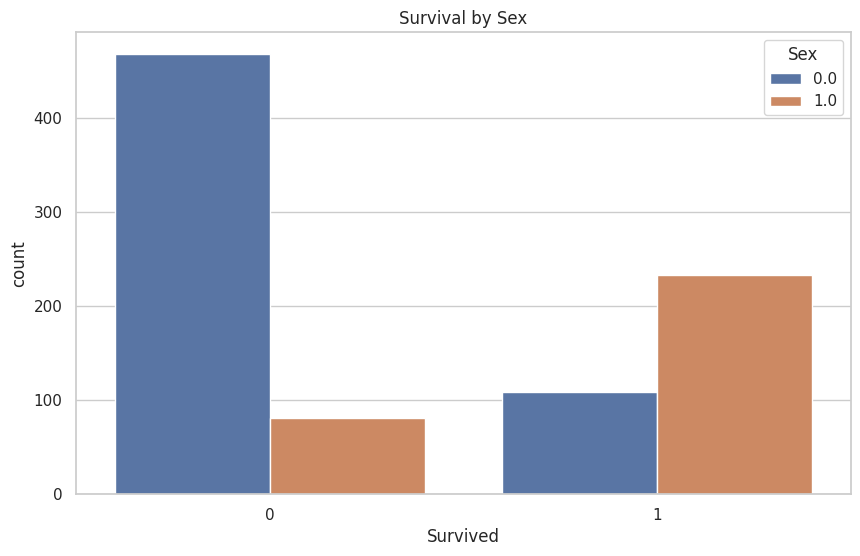

In [38]:
# Set visual style
sns.set(style="whitegrid")

# Survival by Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Sex')
plt.show()

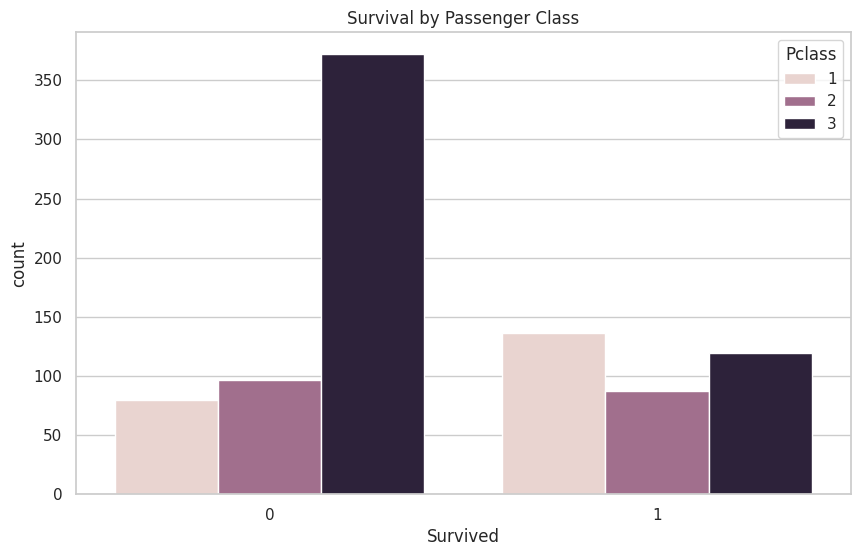

In [39]:
# Survival by Pclass
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Passenger Class')
plt.show()

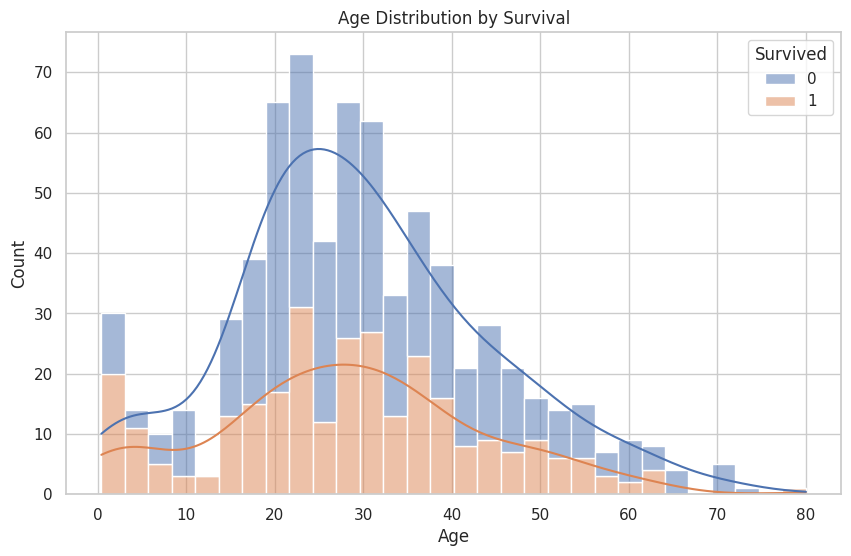

In [40]:
# Age distribution by survival
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.show()

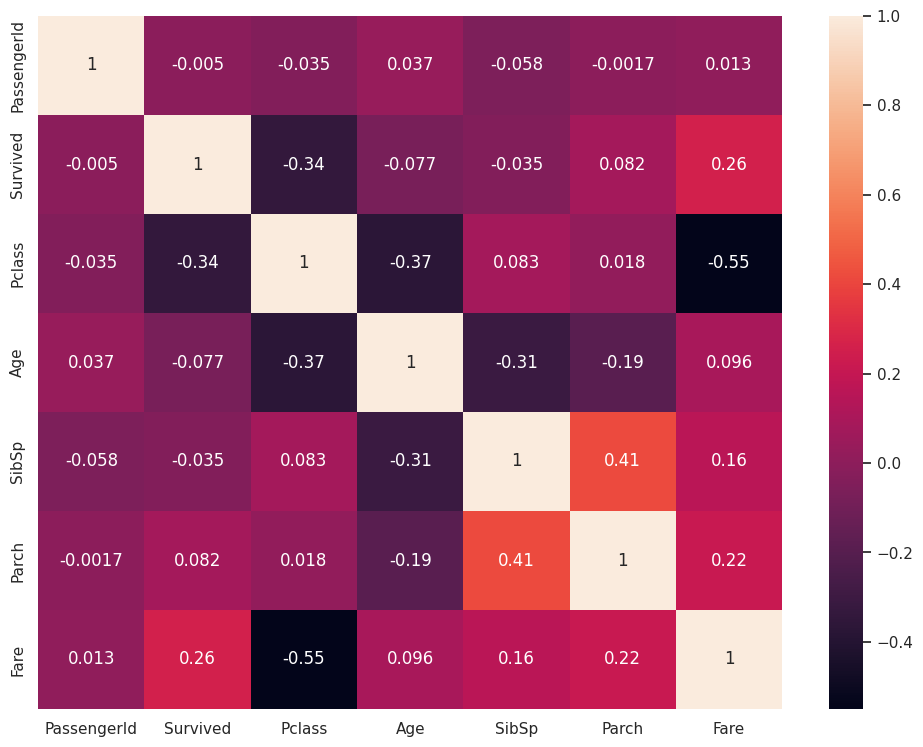

In [41]:
# Correlation matrix heatmap
df_corr = train.astype("float64",errors='ignore')
df_corr = df_corr.select_dtypes(exclude="object")
plt.subplots(figsize=(12,9))
sns.heatmap(df_corr.corr(), annot=True)
plt.show()

#Training the model

In [42]:
# Define features and target
X = df.drop('Survived', axis=1)  # assuming 'Survived' is the target and all other necessary preprocessing has been done
y = df['Survived']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#Testing the model

In [43]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


#Predicting survival

In [44]:
pred = pd.DataFrame()
pred['Id']=df_test['PassengerId']
pred['Survived'] = model.predict(df_test)

pred

,Id,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


from matplotlib import pyplot as plt
pred['Id'].plot(kind='hist', bins=20, title='Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pred['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pred.plot(kind='scatter', x='Id', y='Survived', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Id']
  ys = series['Survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = pred.sort_values('Id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Id')
_ = plt.ylabel('Survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Id'}, axis=1)
              .sort_values('Id', ascending=True))
  xs = counted['Id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = pred.sort_values('Id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
pred['Id'].plot(kind='line', figsize=(8, 4), title='Id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
pred['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)

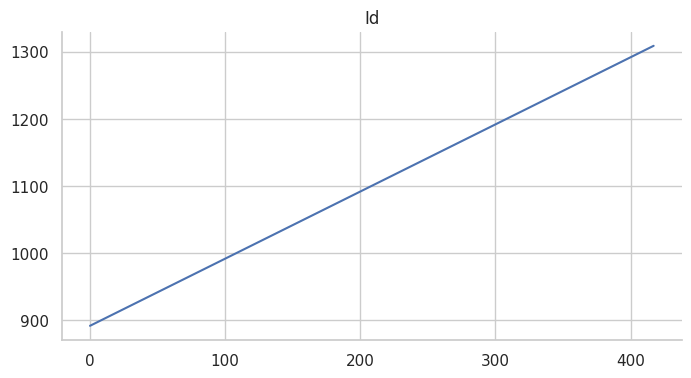

In [45]:
from matplotlib import pyplot as plt
pred['Id'].plot(kind='line', figsize=(8, 4), title='Id')
plt.gca().spines[['top', 'right']].set_visible(False)